## 1. Read the two sheets of the Excel file into separate pandas dataframes (data_df, lookup_df). You are allowed to manually copy the data into new csv files and them read them if you wish .

In [0]:
# Load libraries
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import date 
from datetime import timedelta
from dateutil import relativedelta

from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import *

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# Load dataset
data_df =pd.read_csv("data.csv")
print(data_df.info())
print(data_df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10220 entries, 0 to 10219
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   AccountingDate   10220 non-null  object 
 1   BirthDate        7439 non-null   object 
 2   DealNo           10220 non-null  int64  
 3   DealType         10220 non-null  object 
 4   Email1Desc       4048 non-null   object 
 5   FIDealType       10220 non-null  object 
 6   FIIncome         10220 non-null  float64
 7   FiWipStatusCode  10220 non-null  object 
 8   GrossProfit      10220 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 718.7+ KB
None
(10220, 9)


In [0]:
print(data_df.head())

  AccountingDate   BirthDate  DealNo  ... FIIncome FiWipStatusCode GrossProfit
0     17/03/2012  11/03/1941   64311  ...      0.0               F     1314.73
1     30/10/2014  04/04/1953   87150  ...    250.0               F     1641.55
2     07/06/2012  24/04/1948   66628  ...      0.0               F      425.66
3     13/11/2009  24/05/1925   46106  ...      0.0               F     4032.21
4     31/08/2006  12/06/1958   25584  ...      0.0               F     -369.10

[5 rows x 9 columns]


In [0]:
data_df.isnull().sum()

AccountingDate        0
BirthDate          2781
DealNo                0
DealType              0
Email1Desc         6172
FIDealType            0
FIIncome              0
FiWipStatusCode       0
GrossProfit           0
dtype: int64

In [0]:
# Load dataset
lookup_df =pd.read_csv("lookup.csv")
print(lookup_df.info())
print(lookup_df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   DealType    21 non-null     object
 1   FIDealType  20 non-null     object
 2   Sale Type   22 non-null     object
dtypes: object(3)
memory usage: 656.0+ bytes
None
(22, 3)


In [0]:
print(lookup_df.head())

  DealType FIDealType Sale Type
0     Demo       Demo       New
1    Lease       Demo       New
2    Lease        New       New
3     Misc       Misc       New
4      NaN        NaN       New


In [0]:
print(data_df.columns)

Index(['AccountingDate', 'BirthDate', 'DealNo', 'DealType', 'Email1Desc',
       'FIDealType', 'FIIncome', 'FiWipStatusCode', 'GrossProfit'],
      dtype='object')


In [0]:
# Drop duplicate rows
data_df.drop_duplicates(keep ='last' )
data_df.shape


(10220, 9)

In [0]:
data_df['FIDealType'].unique()

array(['New', 'Used', 'Misc', 'Demo', 'Special Order', 'Rental'],
      dtype=object)

# Since after removing duplicates the size remains the same hence there are no duplicates.

## 2. Make your best guess about which column(s) in data_df represent the following ideas. There may be multiple columns representing an idea or its variations: 
* The date a sale (deal) was made 
* A unique identifier representing the deal 
* The buyer’s date of birth 
* The type of vehicle sold 
* Profit made on the deal 

## Answers
a. The date a sale (deal) was made : 'AccountingDate', 'DealNo'

b. A unique identifier representing the deal :'DealNo'

c. The buyer’s date of birth :'BirthDate'

d. The type of vehicle sold :'DealType'

e. Profit made on the deal : 'GrossProfit','DealType'

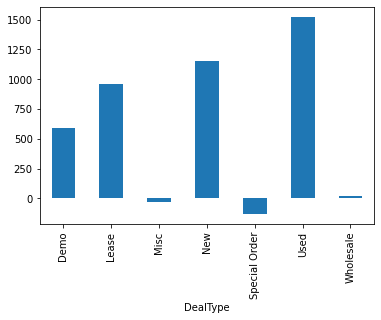

In [0]:
data_df.groupby('DealType')['GrossProfit'].mean().plot(kind='bar', label ="popularity")

## 3. Determine which of these represent categorical vs continuous numerical data.

In [0]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10220 entries, 0 to 10219
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   AccountingDate   10220 non-null  object 
 1   BirthDate        7439 non-null   object 
 2   DealNo           10220 non-null  int64  
 3   DealType         10220 non-null  object 
 4   Email1Desc       10220 non-null  object 
 5   FIDealType       10220 non-null  object 
 6   FIIncome         10220 non-null  float64
 7   FiWipStatusCode  10220 non-null  object 
 8   GrossProfit      10220 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 718.7+ KB


In [0]:
categorical=['AccountingDate', 'BirthDate', 'DealType', 'Email1Desc',
       'FIDealType', 'FiWipStatusCode']
numerical=['FIIncome', 'DealNo','GrossProfit']

## 4. Generate summary statistics and charts to understand statistical properties of numerical columns.

The FIIncome column has a lot of negative values which makes no sense since its the income lets see how many positive values are there.

In [0]:
data_df[data_df['FIIncome']>0]

,AccountingDate,BirthDate,DealNo,DealType,Email1Desc,FIDealType,FIIncome,FiWipStatusCode,GrossProfit
1,30/10/2014,04/04/1953,87150,New,HOME,New,250.00,F,1641.55
5,09/06/2015,07/10/1967,91784,Used,NaN,Used,622.85,F,0.25
7,14/09/2015,NaN,94101,Used,NaN,Used,656.63,F,759.66
8,01/04/2013,07/10/1949,73579,Lease,HOME,New,100.00,F,469.61
11,21/04/2016,10/05/1977,98735,New,HOME,New,200.00,F,94.81
...,...,...,...,...,...,...,...,...,...
10213,30/04/2008,17/09/1956,37296,Used,NaN,Used,666.66,F,-609.67
10216,26/12/2011,09/04/1985,62452,New,HOME,New,200.00,F,1158.69
10217,08/05/2017,25/09/1962,107300,Lease,HOME,New,100.00,F,296.69
10218,31/05/2006,09/10/1985,23725,Used,NaN,Used,885.86,F,2640.45


In [0]:
data_df[data_df['FIIncome'] < 0] = 0

In [0]:
(data_df['FIIncome']>-1).sum()

10220

***VISUAL EDA***

Looking into the box plot it can be observed there are outliers in the gross profit column and the median value lies in between 0 and 2500.

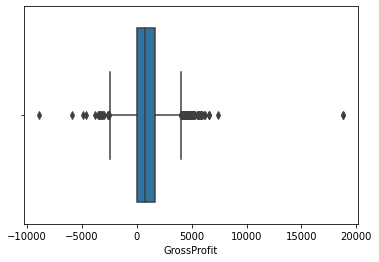

In [0]:
#outliers in GrossProfit
sns.boxplot(x='GrossProfit', data=data_df)

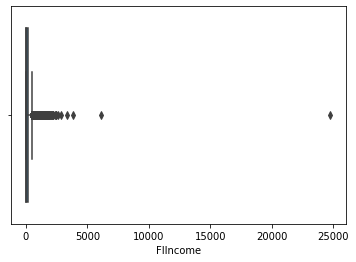

In [0]:
#outliers in FIIncome
sns.boxplot(x='FIIncome', data=data_df)

Text(336.9714285714286, 0.5, 'Gross Profit')

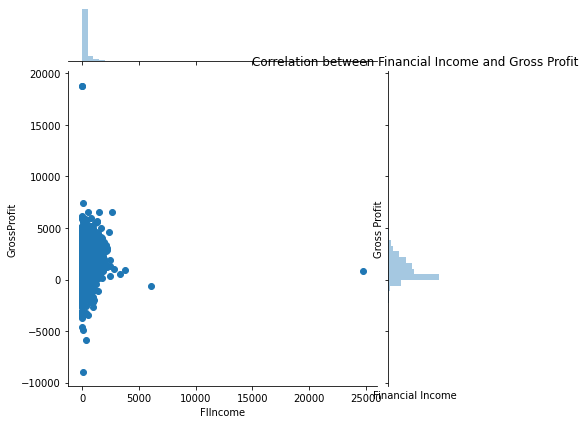

In [0]:
#plotting the correlation between the numerical features
ax = sns.jointplot(x='FIIncome', y='GrossProfit', data=data_df[numerical])
plt.title('Correlation between Financial Income and Gross Profit')
# Set x-axis label
plt.xlabel('Financial Income')
# Set y-axis label
plt.ylabel('Gross Profit')

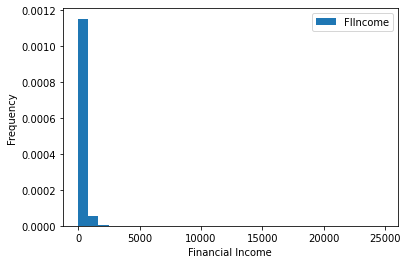

In [0]:
#PDF of FIIncome
#Although FIIncome wont be helping in prediction and therefore can be ignored.
data_df.plot(y='FIIncome', kind='hist',legend='True', bins=30,density=True)
plt.xlabel('Financial Income')
plt.show()

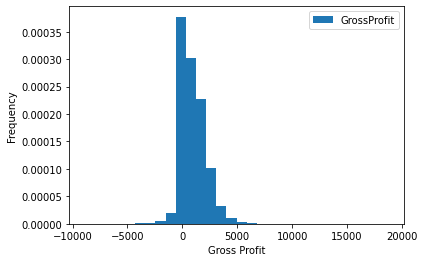

In [0]:
#PDF of FIIncome
data_df.plot(y='GrossProfit', kind='hist',legend='True', bins=30,density=True)
plt.xlabel('Gross Profit')
plt.show()

The overall gross profit lies between -2500 to 5000 with a peak gross profit near to 2500.

(-5000.0, 10000.0)

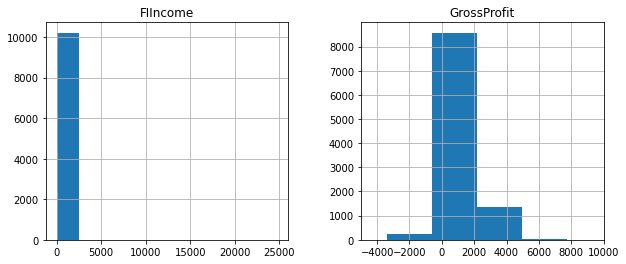

In [0]:
data_df[numerical].hist(figsize=(10, 4))
plt.xlim(-5000,10000)

(-5000.0, 10000.0)

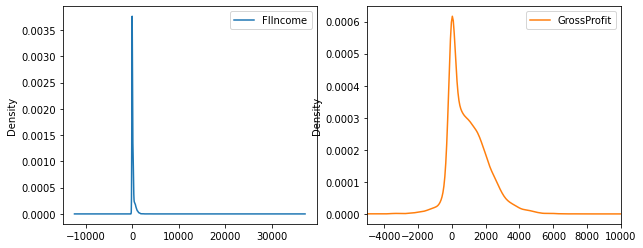

In [0]:
#Looking into the desity plot for a clearer understanding
data_df[numerical].plot(kind='density', subplots=True, layout=(1, 2), 
                  sharex=False, figsize=(10, 4), legend=True)
plt.xlim(-5000,10000)

(-5000.0, 5000.0)

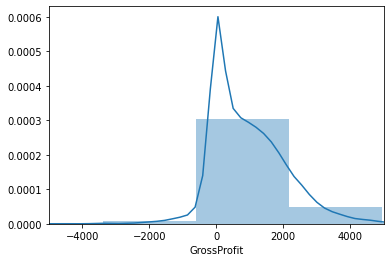

In [0]:
#zooming the plot to have a clearer view
#The mean profit range is in between 0 to 2000
sns.distplot(data_df['GrossProfit'],10)
plt.xlim(-5000,5000)

***STATISTICAL EDA***

In [0]:
#Summarizing the numerical values in the dataset
data_df1=data_df.drop(['DealNo'],axis=1)
data_df1.describe()

,FIIncome,GrossProfit
count,10220.000000,10220.000000
mean,168.398405,944.330480
std,387.303131,1151.401907
min,0.000000,-8923.310000
25%,0.000000,0.000000
50%,0.000000,723.620000
75%,200.000000,1611.217500
max,24768.680000,18805.000000


The highest profit achieved is 18805 while the minimum is -8923.31. Gross profit mean lies near to 947. 


## 5. Generate summary statistics about the categorical columns .

In [0]:
# Counting it by its category
deals_type = data_df.groupby('DealType').size()
deals_type

DealType
0                  18
Demo               16
Lease             915
Misc              569
New              4081
Special Order       3
Used             2641
Wholesale        1977
dtype: int64

***VISUAL EDA***

Text(0, 0.5, 'Number of vehicles dealed')

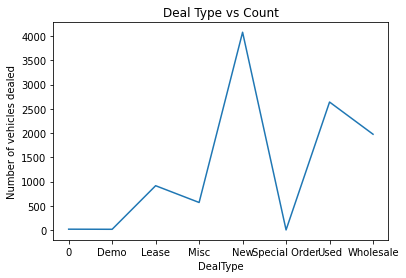

In [0]:
deals_type.plot(title = 'Deal Type vs Count')
plt.ylabel('Number of vehicles dealed')

The largest amount of vehicles sold in the given duration was the New one's. While the second largest were the Used one's. Special category vehiles were dealed the minimum. This maybe due the affordibility or the maintenance charges.

In [0]:
data_df['FIDealType'].unique()

array(['New', 'Used', 'Misc', 'Demo', 0, 'Special Order', 'Rental'],
      dtype=object)

In [0]:
FIdeals_type = data_df.groupby('FIDealType').size()
FIdeals_type

FIDealType
0                  18
Demo               16
Misc             1569
New              5397
Rental              2
Special Order       4
Used             3214
dtype: int64

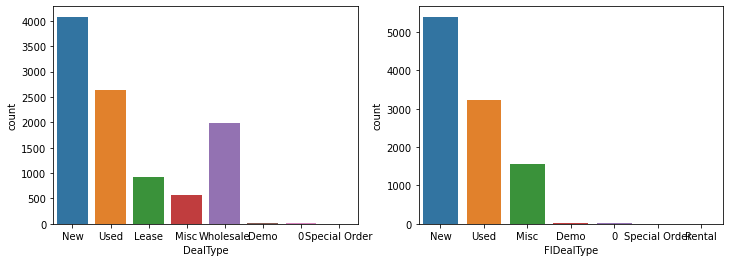

In [0]:
#for comparision between dealtype and FIdeal type.
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

sns.countplot(x='DealType', data=data_df, ax=axes[0]);
sns.countplot(x='FIDealType', data=data_df, ax=axes[1])

In [0]:
#considering other categorical values
data_df['Email1Desc'].unique()

array([nan, 'HOME', 'WORK', 'OTHER', 0], dtype=object)

In [0]:
data_df['Email1Desc'].isnull().sum()
#This has a lot of null values but it wont help in prediction and so can be neglected

6164

In [0]:
#cat value can be replaced with frequently occuring value,i.e. mode
data_df['Email1Desc'].fillna(data_df['Email1Desc'].mode()[0],inplace=True)

In [0]:
data_df['Email1Desc'].isnull().sum()

0

In [0]:
data_df['BirthDate'].unique()

array(['11/03/1941', '04/04/1953', '24/04/1948', ..., '09/04/1985',
       '25/09/1962', '25/10/1965'], dtype=object)

## 6. Suggest ways to clean up this dataset (especially which duplicate data to drop, if any) 

In [0]:
# Drop duplicate 
data_df.drop_duplicates(keep ='last')
data_df.shape


(10220, 9)

In [0]:
# Drop duplicate 
data_df['AccountingDate'].drop_duplicates(keep ='last')
data_df.shape


(10220, 9)

There are no duplicate values as the shape of the data space remains the same after dropping.

In [0]:
#Cleaning the data.
# Drop columns not used or not useful
# DOB can be used if we want to find age group buying vehicles
#Also some of the null values and outliers are to be taken care of which is done in the next section.

data_df2=data_df.drop(['Email1Desc','FIIncome', 'FiWipStatusCode'],axis=1)

## 7. Use the lookup_df to generate a new column in data_df called “SaleType_Clean” based on values in the DealType and FIDealType column 

In [0]:
lookup_df.columns


Index(['DealType', 'FIDealType', 'Sale Type'], dtype='object')

In [0]:
#Merging the new dataset with the existing one and renaming
data_df2=data_df2.merge(lookup_df,how='left')
data_df2 = data_df2.rename({'Sale Type': 'SaleType_Clean'}, axis=1)  
data_df2

,AccountingDate,BirthDate,DealNo,DealType,FIDealType,GrossProfit,SaleType_Clean
0,17/03/2012,11/03/1941,64311,New,New,1314.73,New
1,30/10/2014,04/04/1953,87150,New,New,1641.55,New
2,07/06/2012,24/04/1948,66628,New,New,425.66,New
3,13/11/2009,24/05/1925,46106,New,New,4032.21,New
4,31/08/2006,12/06/1958,25584,Used,Used,-369.10,Used
...,...,...,...,...,...,...,...
10215,05/05/2014,NaN,82974,Wholesale,New,0.00,Wholesale
10216,26/12/2011,09/04/1985,62452,New,New,1158.69,New
10217,08/05/2017,25/09/1962,107300,Lease,New,296.69,New
10218,31/05/2006,09/10/1985,23725,Used,Used,2640.45,Used


## 8. Create a new column to get the age group of the buyer (to do a cohort analysis): 
* Use the date of birth column and use today’s date to calculate the Buyer age.
* Bin the ages into the following age buckets: 

i. Below 25 

ii. 25 – 34 

iii. 34 – 50 

iv. 50+ 

In [0]:
#categorising by age by creating one more column.

data_df2['BirthDate'] = pd.to_datetime(data_df2['BirthDate'])
data_df2['AccountingDate'] = pd.to_datetime(data_df2['AccountingDate'])
#data_df2['Aging'] = (data_df2['BirthDate'].rsub(today, axis=0).dt.days)
data_df2['Aging'] =data_df2['AccountingDate']-data_df2['BirthDate']
data_df2

,AccountingDate,BirthDate,DealNo,DealType,FIDealType,GrossProfit,SaleType_Clean,Aging
0,2012-03-17,1941-11-03,64311,New,New,1314.73,New,25702 days
1,2014-10-30,1953-04-04,87150,New,New,1641.55,New,22489 days
2,2012-07-06,1948-04-24,66628,New,New,425.66,New,23449 days
3,2009-11-13,1925-05-24,46106,New,New,4032.21,New,30854 days
4,2006-08-31,1958-12-06,25584,Used,Used,-369.10,Used,17435 days
...,...,...,...,...,...,...,...,...
10215,2014-05-05,NaT,82974,Wholesale,New,0.00,Wholesale,NaT
10216,2011-12-26,1985-09-04,62452,New,New,1158.69,New,9609 days
10217,2017-08-05,1962-09-25,107300,Lease,New,296.69,New,20038 days
10218,2006-05-31,1985-09-10,23725,Used,Used,2640.45,Used,7568 days


In [0]:
#type(data_df2['Aging'])
data_df2['Aging']

0       25702 days
1       22489 days
2       23449 days
3       30854 days
4       17435 days
           ...    
10215          NaT
10216    9609 days
10217   20038 days
10218    7568 days
10219   14991 days
Name: Aging, Length: 10220, dtype: timedelta64[ns]

In [0]:
#Converting the age to years
data_df2['Aging']=data_df2['Aging']/ np.timedelta64(1, 'Y')

In [0]:
data_df2

,AccountingDate,BirthDate,DealNo,DealType,FIDealType,GrossProfit,SaleType_Clean,Aging
0,2012-03-17,1941-11-03,64311,New,New,1314.73,New,70.369686
1,2014-10-30,1953-04-04,87150,New,New,1641.55,New,61.572791
2,2012-07-06,1948-04-24,66628,New,New,425.66,New,64.201181
3,2009-11-13,1925-05-24,46106,New,New,4032.21,New,84.475383
4,2006-08-31,1958-12-06,25584,Used,Used,-369.10,Used,47.735409
...,...,...,...,...,...,...,...,...
10215,2014-05-05,NaT,82974,Wholesale,New,0.00,Wholesale,NaN
10216,2011-12-26,1985-09-04,62452,New,New,1158.69,New,26.308548
10217,2017-08-05,1962-09-25,107300,Lease,New,296.69,New,54.862181
10218,2006-05-31,1985-09-10,23725,Used,Used,2640.45,Used,20.720480


In [0]:

cat1= data_df2[data_df2['Aging']<25]
cat2= data_df2[(data_df2['Aging']<34) & (data_df2['Aging']>25)]
cat3= data_df2[(data_df2['Aging']<50) & (data_df2['Aging']>34)]
cat4= data_df2[data_df2['Aging']>50]


In [0]:
data_df2[(data_df2['Aging'] < 25)].sort_values('Aging', ascending = False).head(10)

,AccountingDate,BirthDate,DealNo,DealType,FIDealType,GrossProfit,SaleType_Clean,Aging
7058,2006-05-25,1981-05-25,23646,New,New,818.42,New,24.999829
4239,2016-04-04,1991-04-06,98432,Used,Used,-204.44,Used,24.997091
880,2016-09-27,1991-10-06,102545,New,New,893.90,New,24.977926
2246,2007-08-09,1982-08-20,33212,New,New,964.73,New,24.969712
638,2016-02-16,1991-02-28,97415,Lease,New,1329.20,New,24.966974
8481,2012-04-26,1987-05-16,65419,Used,Used,495.00,Used,24.947809
4497,2009-02-01,1984-02-26,40840,New,New,1071.26,New,24.934119
5482,2013-05-07,1988-05-31,76264,Lease,New,764.47,New,24.934119
6116,2007-05-10,1982-06-08,33569,Used,Used,611.35,Used,24.920430
7328,2005-12-30,1981-01-30,21000,Used,Used,1814.71,Used,24.914954


In [0]:
data_df2[(data_df2['Aging'] < 25)].sort_values('Aging', ascending = False).count()

AccountingDate    530
BirthDate         530
DealNo            530
DealType          530
FIDealType        530
GrossProfit       530
SaleType_Clean    512
Aging             530
dtype: int64

In [0]:
data_df2[(data_df2['Aging']<34) & (data_df2['Aging']>25)].sort_values('Aging', ascending = False).count()

BirthDate         1169
DealNo            1169
DealType          1169
FIDealType        1169
GrossProfit       1169
SaleType_Clean    1169
Aging             1169
dtype: int64

In [0]:
data_df2[(data_df2['Aging']<50) & (data_df2['Aging']>34)].sort_values('Aging', ascending = False).count()

BirthDate         2398
DealNo            2398
DealType          2398
FIDealType        2398
GrossProfit       2398
SaleType_Clean    2398
Aging             2398
dtype: int64

In [0]:
data_df2[(data_df2['Aging'] >50)].sort_values('Aging', ascending = False).count()

BirthDate         3342
DealNo            3342
DealType          3342
FIDealType        3342
GrossProfit       3342
SaleType_Clean    3342
Aging             3342
dtype: int64

([<matplotlib.patches.Wedge at 0x7f78a16af128>,
 [Text(-0.9785712042949336, 0.5023926732395323, 'less than 25 years'),
  Text(-1.0676280396703393, -0.26489690241614533, '25 to 34 years'),
  Text(0.19563696551669518, -1.082463014482906, '34 to 50 years'),
  Text(0.5643303120300832, 0.9442093512161532, 'greater than 54 years')],
 [Text(-0.5337661114336001, 0.27403236722156304, '7.1%'),
  Text(-0.5823425670929122, -0.1444892194997156, '15.7%'),
  Text(0.10671107210001556, -0.5904343715361304, '32.2%'),
  Text(0.30781653383459084, 0.5150232824815381, '44.9%')])

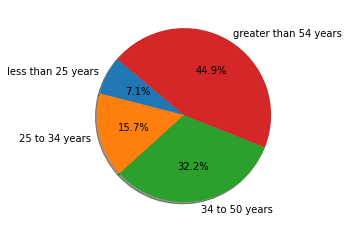

In [0]:
labels = ['less than 25 years', '25 to 34 years', '34 to 50 years', 'greater than 54 years']
deals = [530,1169,2398,3342]
plt.pie(deals, labels=labels,autopct='%1.1f%%', shadow=True, startangle=140 )

The major polpulation with age greater than 50 years buys more vehicles. The pie plot clearly depicts the percentage of deals made by people in different age groups.

## 9. Generate tables and/or charts using your favourite visualization library to summarize: 
* Number of deals made (also called volume) by month, for a six-month period 
* Profit made by month, for a six-month period 
* Repeat a. and b. by SaleType_Clean i.e. monthly breakdown of deals made by Sale Type 
* Repeat a. and b. by Age group of the buyer 

In [0]:
data_df2['AccountingDate'] = pd.to_datetime(data_df2['AccountingDate'])
#t1=today- relativedelta.relativedelta(months=6)

data_df3=data_df2
data_df3.index = pd.to_datetime(data_df3['AccountingDate'])
data_df3.index.names = ['Date']

data_df3.drop(['AccountingDate'], axis=1, inplace=True)
data_df3.head()
#data_df3['AccountingDate'].resample('M').mean()

,BirthDate,DealNo,DealType,FIDealType,GrossProfit,SaleType_Clean,Aging
Date,,,,,,,
2012-03-17,1941-11-03,64311,New,New,1314.73,New,70.369686
2014-10-30,1953-04-04,87150,New,New,1641.55,New,61.572791
2012-07-06,1948-04-24,66628,New,New,425.66,New,64.201181
2009-11-13,1925-05-24,46106,New,New,4032.21,New,84.475383
2006-08-31,1958-12-06,25584,Used,Used,-369.10,Used,47.735409


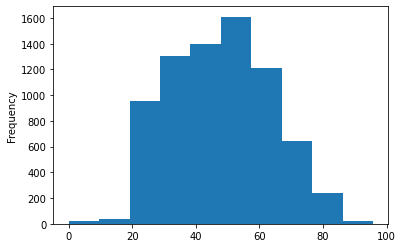

In [0]:
#Analysing the distribution of deals made.
data_df2['Aging'].plot(kind='hist')

Text(0, 0.5, 'GrossProfit')

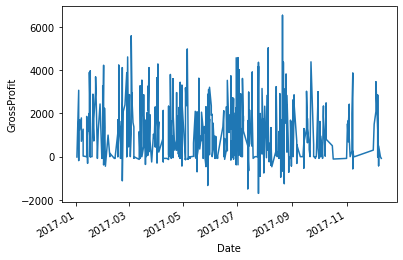

In [0]:
#Analysing the distribution of deals made particularly in last fiscal year.
ax = data_df3.loc['2017', 'GrossProfit'].plot()
ax.set_ylabel('GrossProfit')

Text(0, 0.5, 'GrossProfit')

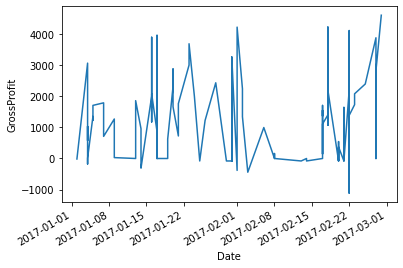

In [0]:
data_df3=data_df3[data_df3['DealNo']>0]
ax = data_df3.loc['2017-01':'2017-02', 'GrossProfit'].plot()
ax.set_ylabel('GrossProfit')

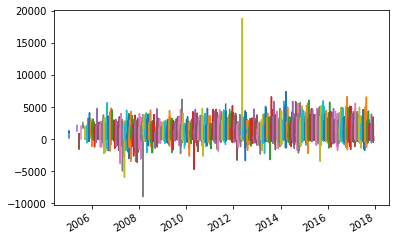

In [0]:
ax = data_df3.loc[:, 'GrossProfit'].resample('M').plot()

#ax.set_ylabel('GrossProfit')

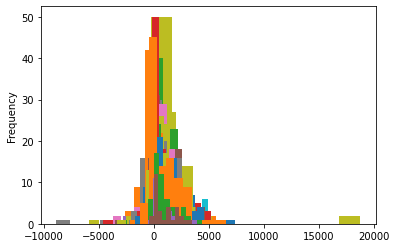

In [0]:
ax = data_df3['GrossProfit'].resample('M').plot(kind='hist')
plt.show()

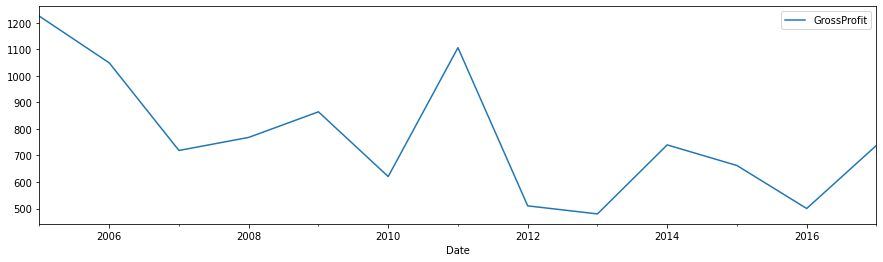

In [0]:
#Analysing the number of deals on yearly basis.
#The number of deals made dropped significantly from 2006 to 2016
data_df3[["GrossProfit"]].resample("1y").median().plot(figsize=(15,4))

In [0]:
data_df3['Aging']

Date
2012-03-17    70.369686
2014-10-30    61.572791
2012-07-06    64.201181
2009-11-13    84.475383
2006-08-31    47.735409
                ...    
2014-05-05          NaN
2011-12-26    26.308548
2017-08-05    54.862181
2006-05-31    20.720480
2006-11-10    41.043964
Name: Aging, Length: 10202, dtype: float64

In [0]:
data_df3_6m = data_df3.resample('6M').mean()
data_df3_6m[data_df3_6m['DealNo']>0]

,DealNo,GrossProfit,Aging
Date,,,
2005-01-31,19982.333333,879.453333,59.413495
2005-07-31,20555.320000,220.188400,47.869019
2006-01-31,20826.010989,1194.248901,44.026687
2006-07-31,23563.247283,935.885408,45.697527
2007-01-31,26364.395722,1082.055829,44.703417
2007-07-31,30950.190349,814.335335,43.571447
2008-01-31,33035.268041,688.386289,47.655047
2008-07-31,37649.565217,949.215386,46.351876
2009-01-31,39553.225455,850.077927,47.539079


In [0]:
#Number of deals made resampled to every 6 month.
data_df3['DealNo'].resample('6M').count()

Date
2005-01-31      3
2005-07-31     25
2006-01-31    182
2006-07-31    368
2007-01-31    374
2007-07-31    373
2008-01-31    388
2008-07-31    414
2009-01-31    275
2009-07-31    384
2010-01-31    419
2010-07-31    384
2011-01-31    406
2011-07-31    389
2012-01-31    336
2012-07-31    467
2013-01-31    455
2013-07-31    524
2014-01-31    512
2014-07-31    454
2015-01-31    489
2015-07-31    444
2016-01-31    463
2016-07-31    447
2017-01-31    539
2017-07-31    456
2018-01-31    232
Freq: 6M, Name: DealNo, dtype: int64

In [0]:
data_df3_6m_deal_count= data_df3['DealNo'].resample('6M').count()

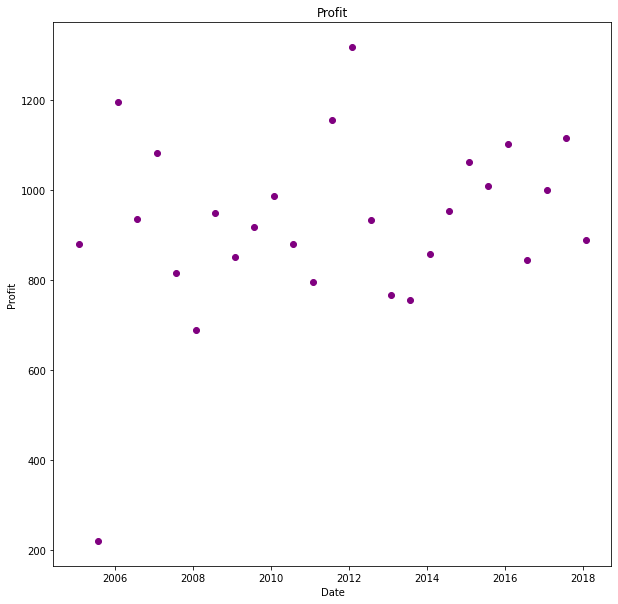

In [0]:
data_df3_6m=data_df3_6m[data_df3_6m['DealNo']>0]
# Create figure and plot space
fig, ax = plt.subplots(figsize=(10, 10))

# Add x-axis and y-axis
ax.scatter(data_df3_6m.index.values,
           data_df3_6m['GrossProfit'],
           color='purple')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Profit",
       title="Profit")

plt.show()

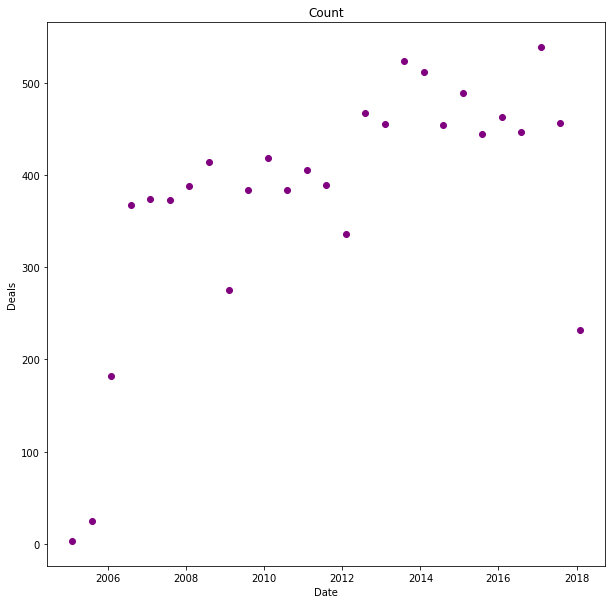

In [0]:
data_df3_6m=data_df3_6m[data_df3_6m['DealNo']>0]
# Create figure and plot space
fig, ax = plt.subplots(figsize=(10, 10))

# Add x-axis and y-axis
ax.scatter(data_df3_6m_deal_count.index.values,
           data_df3_6m_deal_count,
           color='purple')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Deals",
       title="Count")

plt.show()

In [0]:
data_df3_m = data_df3.resample('M').mean()
data_df3_m[data_df3_m['DealNo']>0]

,DealNo,GrossProfit,Aging
Date,,,
2005-01-31,19982.333333,879.453333,59.413495
2005-02-28,19996.000000,1390.270000,39.045292
2005-03-31,19638.000000,1325.270000,61.364710
2005-05-31,20350.000000,1715.780000,40.015880
2005-06-30,20652.473684,-146.087895,NaN
...,...,...,...
2017-08-31,109530.567308,920.721058,47.372180
2017-09-30,109868.716981,848.736415,46.175954
2017-10-31,107323.142857,687.194286,42.037140


In [0]:
data_6m_profit= data_df3_m.sort_values(by='Date',ascending=True, inplace=False).tail(6)
data_6m_profit

,DealNo,GrossProfit,Aging
Date,,,
2017-07-31,108242.650000,1082.045700,49.398089
2017-08-31,109530.567308,920.721058,47.372180
2017-09-30,109868.716981,848.736415,46.175954
2017-10-31,107323.142857,687.194286,42.037140
2017-11-30,108246.391304,916.738261,46.430600
2017-12-31,108219.677419,970.670645,53.640430


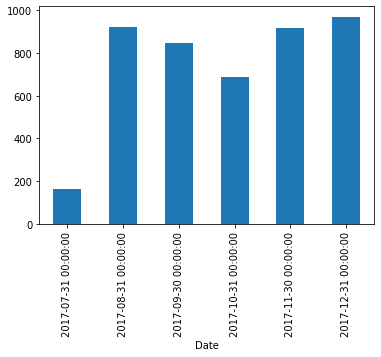

In [0]:
data_df3.loc['2017-07-31':'2017-12-31', 'GrossProfit'].resample('M').mean().plot(kind='bar')
#ax.set_ylabel('GrossProfit')

This gives the gross profit for the last 6 months which was the highest in the december 2017

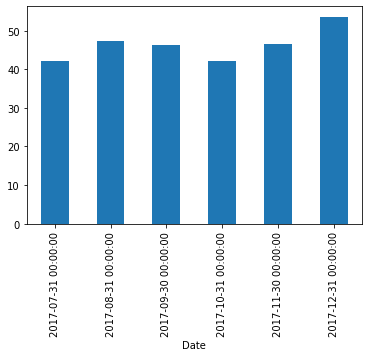

In [0]:
data_df3.loc['2017-07-31':'2017-12-31', 'Aging'].resample('M').mean().plot(kind='bar')
#ax.set_ylabel('GrossProfit')

Overall the deals were made between the age group of 40 to 50 years old in the last 6 months.

In [0]:
data_df3.loc['2017-07-31':'2017-12-31', 'Aging'].resample('M').mean()

Date
2017-07-31    42.259595
2017-08-31    47.372180
2017-09-30    46.175954
2017-10-31    42.037140
2017-11-30    46.430600
2017-12-31    53.640430
Freq: M, Name: Aging, dtype: float64

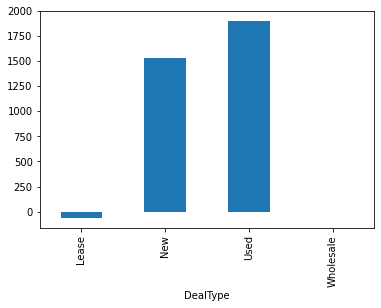

In [0]:
data_df3_sales_6m=data_df3.loc['2017-06-30':'2017-12-31']
data_df3_sales_6m.groupby('DealType')['GrossProfit'].median().plot(kind='bar', label ="popularity")

Mostly, the used cars were dealed in last 6 months rather then the new vehicles as compared to the overall trends in the dataset.

In [0]:
data_df3_m_deal_count=data_df3_m['DealNo'].resample('M').count()
data_df3_m_deal_count

Date
2005-01-31    1
2005-02-28    1
2005-03-31    1
2005-04-30    0
2005-05-31    1
             ..
2017-08-31    1
2017-09-30    1
2017-10-31    1
2017-11-30    1
2017-12-31    1
Freq: M, Name: DealNo, Length: 156, dtype: int64

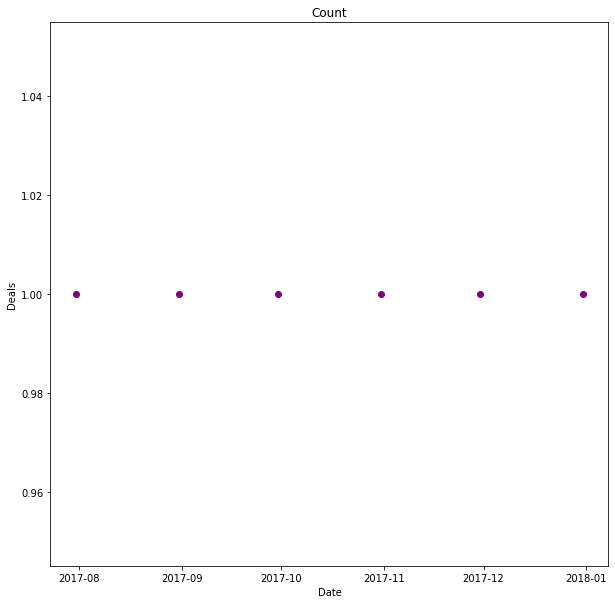

In [0]:
data_df3_m_deal_count=data_df3_m_deal_count.tail(6)
# Create figure and plot space
fig, ax = plt.subplots(figsize=(10, 10))

# Add x-axis and y-axis
ax.scatter(data_df3_m_deal_count.index.values,
           data_df3_m_deal_count,
           color='purple')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Deals",
       title="Count")

plt.show()

In [0]:

data_df3=data_df3.sort_values(by='Date',ascending=True, inplace=False)
data_df3=data_df3[data_df3['DealNo']>0]
data_df3

,BirthDate,DealNo,DealType,FIDealType,GrossProfit,SaleType_Clean,Aging
Date,,,,,,,
2005-01-11,1946-04-13,19980,New,New,1211.32,New,58.750009
2005-01-11,1930-08-07,19978,New,New,255.04,New,74.432740
2005-01-11,1959-12-22,19989,New,New,1172.00,New,45.057736
2005-02-12,1966-01-27,19996,New,New,1390.27,New,39.045292
2005-03-11,1943-10-30,19638,New,New,1325.27,New,61.364710
...,...,...,...,...,...,...,...
2017-12-07,NaT,108871,Wholesale,Used,200.00,Wholesale,NaN
2017-12-07,NaT,108879,Wholesale,Used,100.00,Wholesale,NaN
2017-12-07,NaT,108869,Wholesale,Used,150.00,Wholesale,NaN


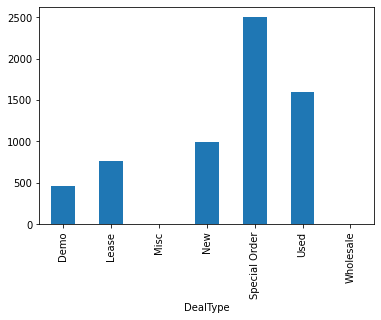

In [0]:
data_df3.groupby('DealType')['GrossProfit'].median().plot(kind='bar', label ="popularity")

In [0]:
data_df3.head()

,BirthDate,DealNo,DealType,FIDealType,GrossProfit,SaleType_Clean,Aging
Date,,,,,,,
2005-01-11,1946-04-13,19980,New,New,1211.32,New,58.750009
2005-01-11,1930-08-07,19978,New,New,255.04,New,74.432740
2005-01-11,1959-12-22,19989,New,New,1172.00,New,45.057736
2005-02-12,1966-01-27,19996,New,New,1390.27,New,39.045292
2005-03-11,1943-10-30,19638,New,New,1325.27,New,61.364710


In [0]:
data_df3['DealType'].unique()

array(['New', 'Misc', 'Used', 'Demo', 'Special Order', 'Lease',
       'Wholesale'], dtype=object)

In [0]:
data_df3['DealType'].value_counts()

New              4081
Used             2641
Wholesale        1977
Lease             915
Misc              569
Demo               16
Special Order       3
Name: DealType, dtype: int64

In [0]:
encode={'DealType':{'Used':1, 'New':2, 'Wholesale':3, 'Lease':4, 'Demo':5, 'Misc':6,
       'Special Order':7}}
data_df3.replace(encode, inplace=True)
encode={'SaleType_Clean':{'Used':1, 'New':2, 'Wholesale':3, 'Lease':4, 'Demo':5, 'Misc':6,
       'Special Order':7}}
data_df3.replace(encode, inplace=True)

## 10. [BONUS] Based on your analyses, what kind of recommendations would you make to this dealership to improve sales? 

Based on the EDA, the population aged between 40 to 50 years buys more vehicles as compared to other age groups. And mostly the vehicles sold are the new or old. More fucus should be given to other categories dealing like lease or special categoried vehicles which could boost the Gross Profit significantly. One of the measures could be advertising about the other deal types available in the company. Also the sales has dropped drastically in just 10 years duration. This maybe due to some technical or manufacturing issues or less improvements in the upcomin models.

## 11. [BONUS] Use your favourite forecasting algorithm (or create your own!) to forecast sales for the next month.

In [0]:
from sklearn.utils import shuffle
data_df3=shuffle(data_df3)
data_class=data_df3.loc[:,'SaleType_Clean']
data=data_df3.loc[:,['DealType',	'GrossProfit','Aging']]
feature = ['DealType',	'GrossProfit','Aging']
mean_corr=data_df3[feature].corr()
mean_corr

,DealType,GrossProfit,Aging
DealType,1.000000,-0.375634,0.108384
GrossProfit,-0.375634,1.000000,0.019133
Aging,0.108384,0.019133,1.000000


Text(0.5, 1.0, 'Correlation Plot')

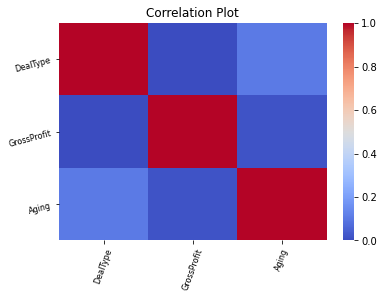

In [0]:
g1 = sns.heatmap(mean_corr, cmap='coolwarm', vmin=0, vmax=1)
g1.set_xticklabels(g1.get_xticklabels(), rotation=70, fontsize=8)
g1.set_yticklabels(g1.get_yticklabels(), rotation=15, fontsize=8)
plt.title("Correlation Plot")

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


#X_train, X_test, Y_train, Y_test = train_test_split(data, data_class, test_size=0.2, stratify=data_class, random_state=30)
#scaler1 = StandardScaler()
#scaler1.fit(data)
#feature_scaled = scaler1.transform(data)

In [0]:
#data_df['Email1Desc'].fillna(data_df['Email1Desc'].mode()[0],inplace=True)
#'DealType',	'GrossProfit','Aging'
data['DealType'].fillna(data['DealType'].mode()[0],inplace=True)
data['GrossProfit'].fillna(data['GrossProfit'].median(),inplace=True)
data['Aging'].fillna(data['Aging'].mean(),inplace=True)

X_train, X_test, Y_train, Y_test = train_test_split(data, data_class, test_size=0.2, stratify=data_class, random_state=30)
scaler1 = StandardScaler()
scaler1.fit(data)
feature_scaled = scaler1.transform(data)

In [0]:
logreg_clf = LogisticRegression()
SVC_model = svm.SVC()
KNN_model = KNeighborsClassifier(n_neighbors=5)

logreg_clf.fit(X_train, Y_train)
SVC_model.fit(X_train, Y_train)
KNN_model.fit(X_train, Y_train)

logreg_prediction= logreg_clf.predict(X_test)
SVC_prediction = SVC_model.predict(X_test)
KNN_prediction = KNN_model.predict(X_test)

# Accuracy score is the simplest way to evaluate
print(accuracy_score(logreg_prediction, Y_test))
print(accuracy_score(SVC_prediction, Y_test))
print(accuracy_score(KNN_prediction, Y_test))

# But Confusion Matrix and Classification Report give more details about performance
print(confusion_matrix(logreg_prediction, Y_test))
print(confusion_matrix(SVC_prediction, Y_test))
print(classification_report(KNN_prediction, Y_test))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7084762371386575
0.6050955414012739
0.7295443410093092
[[ 401   31    0]
 [ 105 1013  364]
 [  23   72   32]]
[[134  97   0]
 [322 769  64]
 [ 73 250 332]]
              precision    recall  f1-score   support

           1       0.46      0.56      0.50       429
           2       0.80      0.74      0.77      1204
           3       0.90      0.87      0.89       408

    accuracy                           0.73      2041
   macro avg       0.72      0.73      0.72      2041
weighted avg       0.75      0.73      0.74      2041



In [93]:
Knn_model = KNeighborsClassifier(n_neighbors=5)
Knn_model.fit(X_train, Y_train)
Knn_model_prediction=Knn_model.predict(X_test)
print(accuracy_score(Knn_model_prediction, Y_test))

0.7295443410093092


In [94]:
gnb = GaussianNB()
gnb.fit(X_train, Y_train)
gnb_prediction=gnb.predict(X_test)
print(accuracy_score(gnb_prediction, Y_test))

0.9980401763841255


In [95]:
dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train)
dt_prediction=dt.predict(X_test)
print(accuracy_score(dt_prediction, Y_test))

0.9995100440960314


In [97]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=100)
clf.fit(X_train, Y_train)
clf_prediction=clf.predict(X_test)
print(accuracy_score(clf_prediction, Y_test))

0.8054875061244487


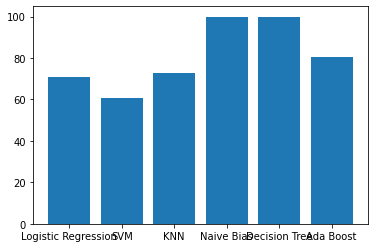

In [105]:
algo = ['Logistic Regression','SVM', 'KNN', 'Naive Bias', 'Decision Tree', 'Ada Boost']
accuracy = [70.84,60.50,72.954,99.80,99.95,80.548]
y_pos = np.arange(len(algo))

plt.bar(y_pos,accuracy)
plt.xticks(y_pos,algo)
plt.show()

Naive Bias and Decision tree classifiers gives the highest accuracy in prediction.